### **1) Import Libraries**

In [ ]:
!pip install -q ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import re 

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter 

import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable



from sklearn.model_selection import train_test_split

#keras
from sklearn.metrics import classification_report
from keras.layers import (Dense, Embedding, Reshape, Activation, 
                          SimpleRNN, LSTM, Convolution1D, 
                          MaxPooling1D, Dropout, Bidirectional)
from keras.utils import np_utils
from keras.datasets import imdb, reuters

from keras.models import Sequential

#Ktrain
import ktrain
from ktrain import text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split




In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### **2) Getting Data & Exploratory Data Analysis**

In [ ]:
df=pd.read_csv('/content/Tweets.txt', sep='\t', names=["text" , "category"])

In [ ]:
df

,text,category
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL
...,...,...
9689,والغاز مش مدعوم يا إنسان؟ وماذا عن الأسمنت وال...,NEG
9690,اغلاق كل الساحات والميادين الكبرى لمنع صلاة ال...,NEG
9691,"#الشروق ""الداخلية"": 400 ألف مواطن تقدموا لأداء...",OBJ
9692,#هتحبك_لو صحتها من النوم علشان تقولها بحبك ;),POS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9694 entries, 0 to 9693
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9694 non-null   object
 1   category  9694 non-null   object
dtypes: object(2)
memory usage: 151.6+ KB


In [ ]:
y=df['category']
y.value_counts()


OBJ        6470
NEG        1642
NEUTRAL     805
POS         777
Name: category, dtype: int64

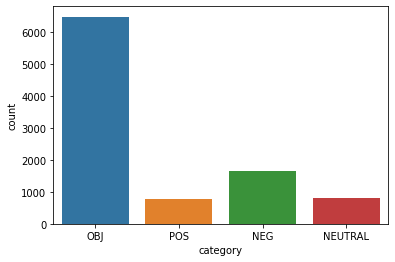

In [ ]:
sns.countplot(data= df, x = "category")
plt.show()

In [ ]:
df.isna().sum()

text        0
category    0
dtype: int64

In [ ]:
df.duplicated().sum()

4

In [ ]:
df['category'].unique()

array(['OBJ', 'POS', 'NEG', 'NEUTRAL'], dtype=object)

In [ ]:
#label encoder (encoding the category coulumn )
label_encoder = preprocessing.LabelEncoder()
df['category']=label_encoder.fit_transform(df['category'])


In [ ]:
#POS=3 , NEG=0 , OBJ=2 , NEUTRAL=1
df['category'].unique()


array([2, 3, 0, 1])

In [ ]:
df

,text,category
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,2
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,3
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,0
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,2
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,1
...,...,...
9689,والغاز مش مدعوم يا إنسان؟ وماذا عن الأسمنت وال...,0
9690,اغلاق كل الساحات والميادين الكبرى لمنع صلاة ال...,0
9691,"#الشروق ""الداخلية"": 400 ألف مواطن تقدموا لأداء...",2
9692,#هتحبك_لو صحتها من النوم علشان تقولها بحبك ;),3


### **3) Text Cleaning**

In [ ]:

#remove stop_words

stop_words = stopwords.words('arabic')

def remove_stopwords(text):
  return " ".join([word for word in text.split(" ") if word not in stop_words])


#remove Hashtages-----------------------------------------------------------------------
hashtages = re.compile(pattern="#[\w\d]+")
def remove_hashtages(text):
  return hashtages.sub(repl="", string=text)

#remove mentions -----------------------------------------------------------------------
mensions = re.compile('@\w+')
def remove_mentions(text):
  return mensions.sub(repl="", string=text)

#remove Punctuations Mark---------------------------------------------------------------
punctuation_marks = re.compile(r"""[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""")

def remove_punch_marks(text):
  return punctuation_marks.sub(repl="", string=text)

#Remove HTTP URLs------------------------------------------------------------------------
def remove_url(text):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)

#Remove Numbers--------------------------------------------------------------------------
numbers = re.compile('\d+')
def remove_numbers(text):
  return numbers.sub(repl="", string=text)

#Remove Multiple Whitespaces-------------------------------------------------------------
multiple_whitespace = re.compile('\s{2,}')

def remove_whitespace(text):
  return multiple_whitespace.sub(repl=" ", string=text)

#Remove repeating char-------------------------------------------------------------------
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

#Lemmatization---------------------------------------------------------------------------
def lemmatization(text):
  lemmatizer = WordNetLemmatizer()
  words_tokenizes = nltk.word_tokenize(text)
  lemmatized_string = " ".join([lemmatizer.lemmatize(word) for word in words_tokenizes])
  return lemmatized_string

#Stemming--------------------------------------------------------------------------------
def stemmer(text):
    stemr = PorterStemmer()
    words_tokens = nltk.word_tokenize(text)
    stemmer_string = ' '.join([stemr.stem(words) for words in words_tokens])
    return stemmer_string

#Normalize
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text


In [ ]:
def test_clean(function,sample):
  print(sample,function(sample), sep='\n')


 **Remove** **Emoji**

In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import demoji
demoji.download_codes()

In [ ]:
def remove_emoji(text):
  dem = demoji.findall(text)
  for item in dem.keys():
    text = text.replace(item, '')
  return text



 **Clean** **all**

In [ ]:

def clean_all(text):
  text = remove_url(text)
  text = remove_hashtages(text)
  text = remove_mentions(text)
  text = remove_punch_marks(text)
  text = remove_numbers(text)
  text = remove_stopwords(text)
  text = remove_whitespace(text)
  text = remove_emoji(text)
  text = normalize_arabic(text)
  text = remove_repeating_char(text)

 # text = lemmatization(text)
 # text = stemmer(text) 
  return text



In [ ]:
clean_text = []

for text in df['text']:
  new_data = clean_all(text)
  clean_text.append(new_data)

clean_df = pd.DataFrame({'text':clean_text, 'category':df['category']})
clean_df

,text,category
0,استقاله رئيس نتظر استقاله,2
1,اهنئ الدكتور احمد جمال الدين القيادي بحزب مصر ...,3
2,البرادعي يستقوي بامريكا مرهاخري يرسل عصام العر...,0
3,شاهد فيلم استقصائي يتناول اسرار كواليس تعرض ل...,2
4,الوالده اقولها بخاطري حشيشه تضحك اقولها مل اله...,1
...,...,...
9689,والغاز مش مدعوم انسان وماذا الاسمنت والحديد وا...,0
9690,اغلاق الساحات والميادين الكبري لمنع صلاه العيد...,0
9691,الداخليه مواطن تقدموا لاداء الحج وبدء اجراء ا...,2
9692,صحتها النوم علشان تقولها بحبك,3


In [ ]:
clean_df["text"].head(10)

0                           استقاله رئيس نتظر استقاله 
1    اهنئ الدكتور احمد جمال الدين القيادي بحزب مصر ...
2    البرادعي يستقوي بامريكا مرهاخري يرسل عصام العر...
3     شاهد فيلم استقصائي يتناول اسرار كواليس تعرض ل...
4    الوالده اقولها بخاطري حشيشه تضحك اقولها مل اله...
5                                                     
6                 امير عيد الي فعلا يتقال ستريكر صريح 
7    احكي قصه حدثت شاب الفتيات بينهم حب كبير حدثت غ...
8    ادعوكم لحضور الندوه الثقافيه الاربعاء مركز اعد...
9    عوده جماعه الاخوان الحياه السياسيه بنفس وضعها ...
Name: text, dtype: object

## **4)Text** **information**

In [ ]:
all_words = [word for tokens in clean_df["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_df["text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

600575 words total, with a vocabulary size of 232
Max sentence length is 4213


In [ ]:
clean_df['text']

0                              استقاله رئيس نتظر استقاله 
1       اهنئ الدكتور احمد جمال الدين القيادي بحزب مصر ...
2       البرادعي يستقوي بامريكا مرهاخري يرسل عصام العر...
3        شاهد فيلم استقصائي يتناول اسرار كواليس تعرض ل...
4       الوالده اقولها بخاطري حشيشه تضحك اقولها مل اله...
                              ...                        
9689    والغاز مش مدعوم انسان وماذا الاسمنت والحديد وا...
9690    اغلاق الساحات والميادين الكبري لمنع صلاه العيد...
9691     الداخليه مواطن تقدموا لاداء الحج وبدء اجراء ا...
9692                       صحتها النوم علشان تقولها بحبك 
9693                        شي كتبته غلط شي حسبته غلط في 
Name: text, Length: 9694, dtype: object

# **5)Save** **cleaned** **data** **for** **training**

In [ ]:
clean_df.to_csv('dL_nlp_cleaned.csv', index=False)

# **6**) **Modeling** 

## Modeling The Clean data with BERT 

In [ ]:
clean_df = pd.read_csv('/content/dL_nlp_cleaned.csv')

In [ ]:
clean_df

,text,category
0,استقاله رئيس نتظر استقاله,2
1,اهنئ الدكتور احمد جمال الدين القيادي بحزب مصر ...,3
2,البرادعي يستقوي بامريكا مرهاخري يرسل عصام العر...,0
3,شاهد فيلم استقصائي يتناول اسرار كواليس تعرض ل...,2
4,الوالده اقولها بخاطري حشيشه تضحك اقولها مل اله...,1
...,...,...
9689,والغاز مش مدعوم انسان وماذا الاسمنت والحديد وا...,0
9690,اغلاق الساحات والميادين الكبري لمنع صلاه العيد...,0
9691,الداخليه مواطن تقدموا لاداء الحج وبدء اجراء ا...,2
9692,صحتها النوم علشان تقولها بحبك,3


In [ ]:
 X=clean_df['text'].astype(str)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import np_utils

seq_len = 80
max_vocab=2000

tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X)

y=clean_df['category']

X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20,  random_state=42)

y_train2=np_utils.to_categorical(y_train)
y_test2=np_utils.to_categorical(y_test)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen=seq_len)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,maxlen=seq_len)


In [ ]:
X_train.shape

(7755, 80)

**Modeling** **clean** **data** 

In [ ]:
model = Sequential()
model.add(Dense(2,input_dim=X_train.shape[1],name='2D_layer'))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X_train,y_train2,epochs=65,batch_size=64,verbose=1)

Epoch 1/65
122/122 [==============================] - 1s 3ms/step - loss: 72.9895
Epoch 2/65
122/122 [==============================] - 0s 3ms/step - loss: 16.2338
Epoch 3/65
122/122 [==============================] - 0s 3ms/step - loss: 4.1447
Epoch 4/65
122/122 [==============================] - 0s 3ms/step - loss: 1.8380
Epoch 5/65
122/122 [==============================] - 0s 3ms/step - loss: 1.4321
Epoch 6/65
122/122 [==============================] - 0s 3ms/step - loss: 1.2379
Epoch 7/65
122/122 [==============================] - 0s 3ms/step - loss: 1.1410
Epoch 8/65
122/122 [==============================] - 0s 2ms/step - loss: 1.0811
Epoch 9/65
122/122 [==============================] - 0s 2ms/step - loss: 1.0393
Epoch 10/65
122/122 [==============================] - 0s 2ms/step - loss: 1.0152
Epoch 11/65
122/122 [==============================] - 0s 2ms/step - loss: 1.0019
Epoch 12/65
122/122 [==============================] - 0s 2ms/step - loss: 0.9933
Epoch 13/65
122/122 [==

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test2, (model.predict(X_test)>0.5).astype("int32"))

61/61 [==============================] - 0s 2ms/step


0.6580711707065497

**LSTM** , **GlobalMaxPool1D**

In [ ]:
from tensorflow.keras.layers import Embedding, Input , Dense , GlobalMaxPool1D,LSTM
input_shape=(np.array(X_train).shape[1])
embedding_dim=20
emb_vocab=max_vocab+1

x_in = Input(shape=input_shape)
x = Embedding(emb_vocab,embedding_dim)(x_in)
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
X = Dense (32, activation='relu') (x)
X = Dense(4, activation='sigmoid')(x)
model = tf.keras.models.Model(x_in,x)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 80, 20)            40020     
                                                                 
 lstm_1 (LSTM)               (None, 80, 15)            2160      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
Total params: 42,180
Trainable params: 42,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
61/61 [==============================] - 2s 8ms/step - loss: 2.3833 - accuracy: 0.5938
Epoch 2/10
61/61 [==============================] - 0s 8ms/step - loss: 0.9155 - accuracy: 0.6712
Epoch 3/10
61/61 [==============================] - 0s 7ms/step - loss: 0.8623 - accuracy: 0.6811
Epoch 4/10
61/61 [==============================] - 0s 7ms/step - loss: 0.8115 - accuracy: 0.7060
Epoch 5/10
61/61 [==============================] - 0s 7ms/step - loss: 0.7737 - accuracy: 0.7260
Epoch 6/10
61/61 [==============================] - 0s 7ms/step - loss: 0.7306 - accuracy: 0.7442
Epoch 7/10
61/61 [==============================] - 0s 7ms/step - loss: 0.7110 - accuracy: 0.7625
Epoch 8/10
61/61 [==============================] - 0s 7ms/step - loss: 0.6795 - accuracy: 0.7711
Epoch 9/10
61/61 [==============================] - 0s 7ms/step - loss: 0.8952 - accuracy: 0.7137
Epoch 10/10
61/61 [==============================] - 0s 7ms/step - loss: 0.8734 - accuracy: 0.6698


In [ ]:
from sklearn.metrics import f1_score

y_pred = np.argmax(model.predict(X_test), axis=1)

print("[loss, acc]: " , model.evaluate(X_test, y_test)) 
print("f1 score for test set: " , f1_score(y_test, y_pred, average="macro"))

61/61 [==============================] - 1s 6ms/step - loss: 0.9523 - accuracy: 0.6596
[loss, acc]:  [0.9523347616195679, 0.6596183776855469]
f1 score for test set:  0.20453918822135417


**BERT**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
clean_df['category'] = le.fit_transform(clean_df['category'])
clean_df.head()



,text,category
0,استقاله رئيس نتظر استقاله,2
1,اهنئ الدكتور احمد جمال الدين القيادي بحزب مصر ...,3
2,البرادعي يستقوي بامريكا مرهاخري يرسل عصام العر...,0
3,شاهد فيلم استقصائي يتناول اسرار كواليس تعرض ل...,2
4,الوالده اقولها بخاطري حشيشه تضحك اقولها مل اله...,1


In [ ]:
clean_df.shape

(9694, 2)

In [ ]:
clean_df['category'].value_counts()

2    6470
0    1642
1     805
3     777
Name: category, dtype: int64

In [ ]:
X = clean_df['text'].tolist()
y = clean_df['category'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_array(x_train = X_train,
                                                                      y_train = y_train,
                                                                      x_test = X_test,
                                                                      y_test = y_test,
                                                                      class_names = ['0', '1','2','3'], 
                                                                      preprocess_mode = 'bert', 
                                                                      ngram_range = 1,
                                                                      maxlen = 320)

preprocessing train...
language: ar


Is Multi-Label? False
preprocessing test...
language: ar


task: text classification


In [ ]:
# define the classifier
model = text.text_classifier('bert',
                              train_data = (X_train, y_train),
                              preproc = preproc)

Is Multi-Label? False
maxlen is 320
done.


In [ ]:
learner = ktrain.get_learner(model,
                             train_data = (X_train, y_train),
                             batch_size = 8)

In [ ]:
history = learner.fit_onecycle(1e-5, 2)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
970/970 [==============================] - 648s 648ms/step - loss: 0.9409 - accuracy: 0.6582
Epoch 2/2
970/970 [==============================] - 629s 649ms/step - loss: 0.8612 - accuracy: 0.6801


In [ ]:
learner.validate(val_data = (X_test, y_test))

61/61 [==============================] - 55s 835ms/step
              precision    recall  f1-score   support

           0       0.46      0.26      0.33       331
           1       0.33      0.01      0.01       163
           2       0.71      0.95      0.81      1297
           3       0.57      0.08      0.14       148

    accuracy                           0.68      1939
   macro avg       0.52      0.32      0.33      1939
weighted avg       0.63      0.68      0.61      1939



array([[  87,    2,  241,    1],
       [  33,    1,  127,    2],
       [  63,    0, 1228,    6],
       [   7,    0,  129,   12]])

## Modeling Data without Cleaning with BERT 

In [ ]:
df=pd.read_csv('/content/Tweets.txt', sep='\t', names=["text" , "category"])

In [ ]:
df

,text,category
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL
...,...,...
9689,والغاز مش مدعوم يا إنسان؟ وماذا عن الأسمنت وال...,NEG
9690,اغلاق كل الساحات والميادين الكبرى لمنع صلاة ال...,NEG
9691,"#الشروق ""الداخلية"": 400 ألف مواطن تقدموا لأداء...",OBJ
9692,#هتحبك_لو صحتها من النوم علشان تقولها بحبك ;),POS


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df.head()



,text,category
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,2
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,3
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,0
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,2
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,1


In [ ]:
df.shape

(9694, 2)

In [ ]:
df['category'].value_counts()

2    6470
0    1642
1     805
3     777
Name: category, dtype: int64

In [ ]:
X = df['text'].tolist()
y = df['category'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_array(x_train = X_train,
                                                                      y_train = y_train,
                                                                      x_test = X_test,
                                                                      y_test = y_test,
                                                                      class_names = ['0', '1','2','3'], 
                                                                      preprocess_mode = 'bert', 
                                                                      ngram_range = 1,
                                                                      maxlen = 320)

downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: ar


Is Multi-Label? False
preprocessing test...
language: ar


task: text classification


In [ ]:
# define the classifier
model = text.text_classifier('bert',
                              train_data = (X_train, y_train),
                              preproc = preproc)

Is Multi-Label? False
maxlen is 320
done.


In [ ]:
learner = ktrain.get_learner(model,
                             train_data = (X_train, y_train),
                             batch_size = 8)

In [ ]:
history = learner.fit_onecycle(1e-5, 2)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
970/970 [==============================] - 648s 648ms/step - loss: 0.9156 - accuracy: 0.6669
Epoch 2/2
970/970 [==============================] - 629s 649ms/step - loss: 0.7786 - accuracy: 0.6984


In [ ]:
learner.validate(val_data = (X_test, y_test))

61/61 [==============================] - 53s 814ms/step
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       321
           1       0.32      0.04      0.08       159
           2       0.75      0.92      0.83      1316
           3       0.41      0.24      0.30       143

    accuracy                           0.71      1939
   macro avg       0.50      0.39      0.41      1939
weighted avg       0.66      0.71      0.66      1939



array([[ 122,    7,  185,    7],
       [  38,    7,  107,    7],
       [  67,    7, 1208,   34],
       [   6,    1,  102,   34]])

**Machine** **Learning** *models*

In [ ]:
X = df['text'].tolist()
y = df['category'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer = CountVectorizer()
vector_count_train = vectorizer.fit_transform(X_train)
vector_count_test = vectorizer.transform(X_test)

In [ ]:
print("n_samples: %d, n_features: %d" % vector_count_train.shape)

n_samples: 7755, n_features: 32544


In [ ]:
f1_scores = []
accuracy = []
models = ['Random Forest','LogisticRegression', 'xgboost']

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
forest_model.fit(vector_count_train, y_train)
pred_forst = forest_model.predict(vector_count_test)
print(classification_report(y_test, pred_forst))

              precision    recall  f1-score   support

         NEG       0.58      0.12      0.20       333
     NEUTRAL       0.50      0.04      0.08       163
         OBJ       0.68      0.97      0.80      1284
         POS       0.42      0.07      0.12       159

    accuracy                           0.67      1939
   macro avg       0.55      0.30      0.30      1939
weighted avg       0.63      0.67      0.58      1939



In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(vector_count_train, y_train)
pred_clf = clf.predict(vector_count_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         NEG       0.48      0.30      0.37       333
     NEUTRAL       0.30      0.09      0.13       163
         OBJ       0.72      0.92      0.81      1284
         POS       0.50      0.13      0.21       159

    accuracy                           0.68      1939
   macro avg       0.50      0.36      0.38      1939
weighted avg       0.62      0.68      0.63      1939



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **RESULT**

**Modeling** **With** **cleaning**


> Dense , Sequential  = 0.65


> LSTM , GlobalMaxPool1D = 0.65


> BERT = 0.68

**Modeling** **Without** **Cleaing** 


> BERT = 0.71


> random forest = 0.67


> LogisticRegression = 0.68















**Conclusion** **Best** **Model** **from** **what** **i** **tried**  **BERT** **without** **cleaning** 